# WiDS Assignment


**Welcome to your EDA assignment ! We hope you are excited to implement and test everything you have learnt up until now. The dataset which you'll use includes information about Pokemons.**

**We've got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!**

This assignment is expected to be completed in Jupyter notebooks or Google Colab and submitted as an ipynb file.


### 1) Start by importing all important libraries
For eg, "import numpy as np"

Import numpy, matplotlib, seaborn, pandas and any others that you require.

In [1]:
#your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples

### 2) Read the csv file and assign it to a variable . 

In [2]:
data=pd.read_csv("C://Users//Rhishabh//Downloads//pokemon_dataset.csv")

### 3) Display shape of dataframe
Expected Output - (800, 13)

In [3]:
df=pd.DataFrame(data)
df.shape

(800, 13)

### 4) Print all columns of dataframe
Return an array containing names of all the columns.

In [4]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

### 5) Remove the column '#' and update the dataframe.

In [5]:
df=df.drop(['#'],axis=1)

###  7) Print a list of all the unique Type-1 powers

In [6]:
print(df['Type 1'].unique().tolist())

['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric', 'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice', 'Dragon', 'Dark', 'Steel', 'Flying']


### 1. How many pokemons have 'Mega' in their name?

In [7]:
len(df[df['Name'].str.find('Mega')!=-1])

# ALternative for number of rows and columns
#df[df['Name'].str.find('Mega')!=-1].shape


49

### 2. What is the standard deviation of Sp. Def. in the dataset ?

In [8]:
df['Sp. Def'].std()

27.82891579711745

### 3. What percentage (upto 3 decimal places) of pokemons are legendary ? 

In [9]:
round(len(df[df['Legendary']==True])/len(df[df['Legendary']==False])*100,3)

8.844

**Now that you have imported the dataset and libraries, and answered some basic questions, you can move on to the visualizations and some intermediate statistics !**

### Discrete variables:
a. For each variable, plot the frequency of each unique value (histogram).

b. For each variable, identify the mode value.

### Continuous variables:

(Define a function for parts 'a' and 'b' which will accept feature name as input and print/plot required quantities as output. This will save time)

a. For each variable, print mean, variance, skew, min, max, median, 25th percentile, 75th percentile, and inter-quartile range.

b. For each variable, plot box-and-whiskers plots.

c. For each variable, plot the histogram. (do this manually for each feature and adjust the number of bins)

d. For any 2 continuous variables, plot the QQ plot. Read online about how it is interpreted.



### Pairwise interactions

a. Pick any two discrete-continuous pairs, and plot box-and-whiskers plot for the continuous variable side-by-side for each value of the discrete variable.

b. Plot a heatmap of correlation between all pairs of continuous variables. Use seaborn for this.

## Analysis for discrete Variables

### 1) Type 1 Pokemon

Mode of Type 1 pokemon= 112


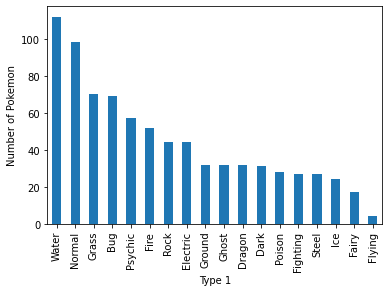

In [10]:
p1=df['Type 1'].value_counts().plot(kind='bar')
p1.set(xlabel='Type 1')
p1.set(ylabel='Number of Pokemon')
print('Mode of Type 1 pokemon=', df['Type 1'].value_counts().max())

### 2) Type 2 Pokemon

Mode of type 2 pokemon=  97


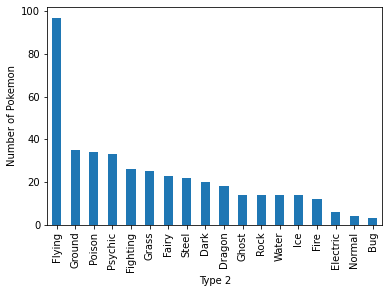

In [11]:
p1=df['Type 2'].value_counts().plot(kind='bar')
p1.set(xlabel='Type 2')
p1.set(ylabel='Number of Pokemon')
print('Mode of type 2 pokemon= ',df['Type 2'].value_counts().max())

### 3) Generation

Mode of Pokemon across all generations=  166


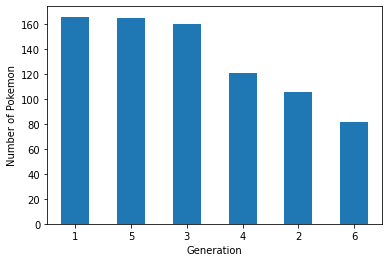

In [12]:
p1= df['Generation'].value_counts().plot(kind='bar')
p1.set(xlabel='Generation',ylabel='Number of Pokemon')
p1.tick_params(axis='x',rotation=0)
print("Mode of Pokemon across all generations= ",df['Generation'].value_counts().max())

## Analysis of continuous variables

### Relevant Statistics

In [13]:
#editing df.describe() to include variance, iqr and skewness
var=df.describe().loc['std']**2
df.describe().drop('std')
#modifying variance,skew and iqr as a dataframe to append to df.describe()
var=pd.DataFrame(var)                  
var.rename(columns={'std':'variance'},inplace=True)
var=var.transpose()
p=df.describe().drop('std') #standard deviation not asked so dropping it
p=p.drop('count') #count not asked so dropping it
skew=pd.DataFrame(df.skew())
skew=skew.transpose()
skew=skew.rename(index={0:'skewness'})
iqr=pd.DataFrame(pd.DataFrame(p.loc['75%']-p.loc['25%']))
iqr=iqr.transpose()
iqr=iqr.rename(index={0:'Inter-Quartile range'})
p=p.append(var)
p=p.append(skew)
p=p.append(iqr)
p.drop(['Legendary','Generation'],axis=1)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
mean,435.102500,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
min,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,330.000000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,450.000000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,515.000000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,780.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000
variance,14391.130907,652.019323,1053.480599,972.410707,1070.748536,774.448554,844.511133
skewness,0.152530,1.568224,0.551614,1.155912,0.744662,0.854019,0.357933
Inter-Quartile range,185.000000,30.000000,45.000000,40.000000,45.250000,40.000000,45.000000


## Plots for continuous variables

## 1) Total

### a) Box Plot

<AxesSubplot:>

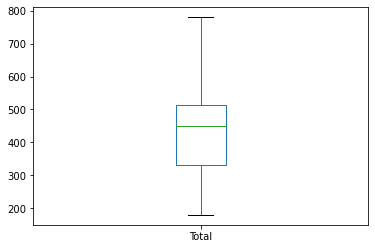

In [14]:
df['Total'].plot(kind='box')

### b) Histogram

<AxesSubplot:ylabel='Frequency'>

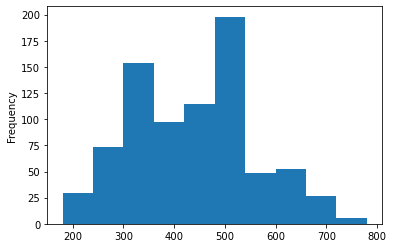

In [15]:
df['Total'].plot(kind='hist')

## 2) HP

### a) Box Plot

<AxesSubplot:>

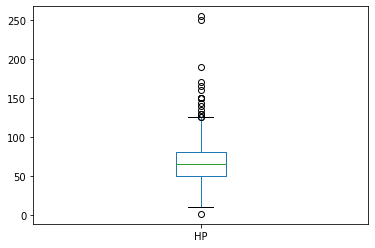

In [16]:
df['HP'].plot(kind='box')

### b) Histogram

<AxesSubplot:ylabel='Frequency'>

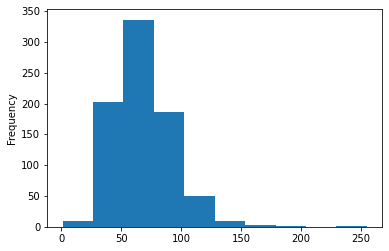

In [17]:
df['HP'].plot(kind='hist')

## 3) Attack

### a) Box Plot

<AxesSubplot:>

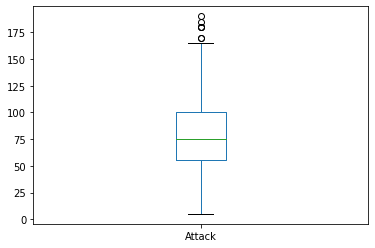

In [18]:
df['Attack'].plot(kind='box')

### b) Histogram

<AxesSubplot:ylabel='Frequency'>

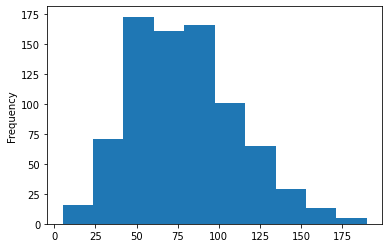

In [19]:
df['Attack'].plot(kind='hist')

## 4) Defense
### a) Box Plot

<AxesSubplot:>

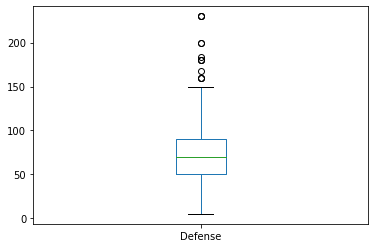

In [20]:
df['Defense'].plot(kind='box')

### b) Histogram

<AxesSubplot:ylabel='Frequency'>

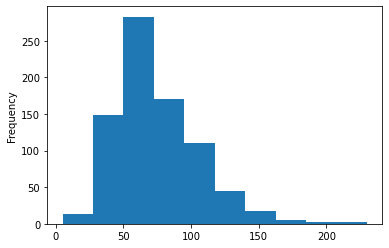

In [21]:
df['Defense'].plot(kind='hist')

## 5) Sp. Atk (Special Attack)
### a) Box Plot

<AxesSubplot:>

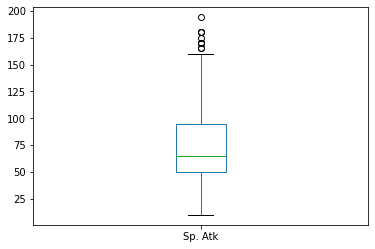

In [22]:
df['Sp. Atk'].plot(kind='box')

### b) Histogram

<AxesSubplot:ylabel='Frequency'>

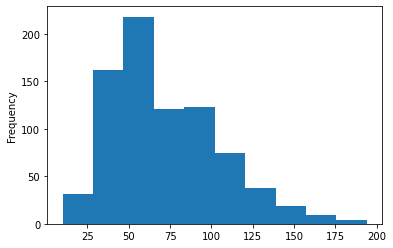

In [23]:
df['Sp. Atk'].plot(kind='hist')

## 6) Sp. Def (Special Defense)
### a) Box Plot

<AxesSubplot:>

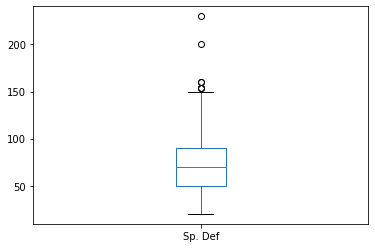

In [24]:
df['Sp. Def'].plot(kind='box')

### b) Histogram

<AxesSubplot:ylabel='Frequency'>

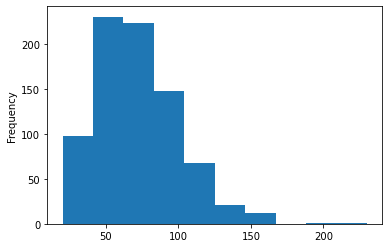

In [25]:
df['Sp. Def'].plot(kind='hist')

## 7) Speed
### a) Box Plot

<AxesSubplot:>

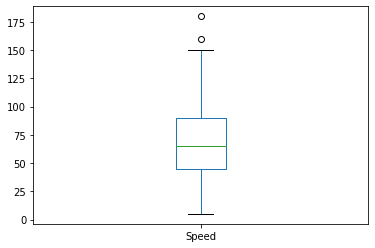

In [26]:
df['Speed'].plot(kind='box')

### b) Histogram

<AxesSubplot:ylabel='Frequency'>

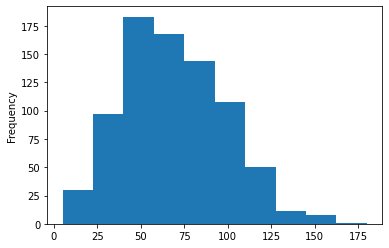

In [27]:
df['Speed'].plot(kind='hist')

## QQ Plot between Attack and Defense of Pokemon

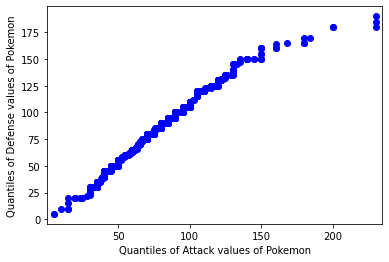

In [28]:
x=sm.ProbPlot(np.array(df['Attack']))
y=sm.ProbPlot(np.array(df['Defense']))
qqplot_2samples(x,y,'Quantiles of Attack values of Pokemon','Quantiles of Defense values of Pokemon')
plt.show()

## Box Plot Between Type 1 and  Attack of Pokemon

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

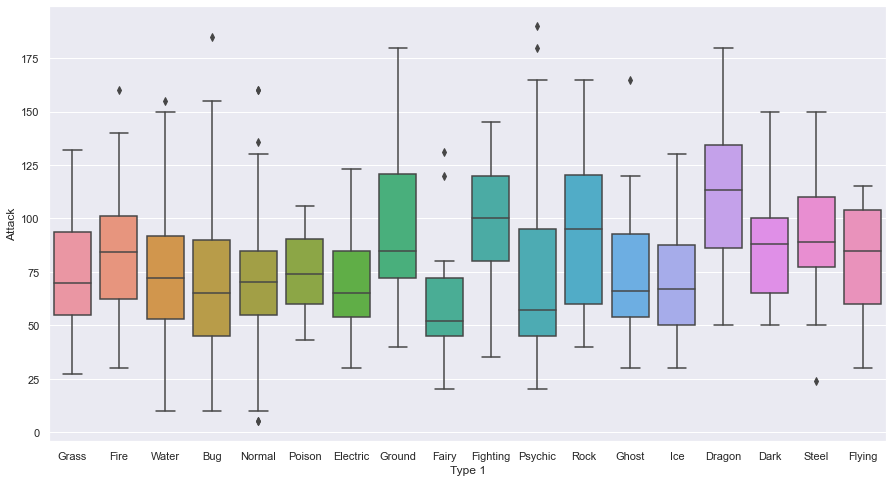

In [29]:
sns.set(rc={'figure.figsize':(15,8)}) #setting size of seaborn plot (in unit inches; 1 unit inch= 80x80 px)
sns.boxplot(x='Type 1',y='Attack',data=df)

## Box Plot between Type 2 and Defense of Pokemon

<AxesSubplot:xlabel='Type 2', ylabel='Defense'>

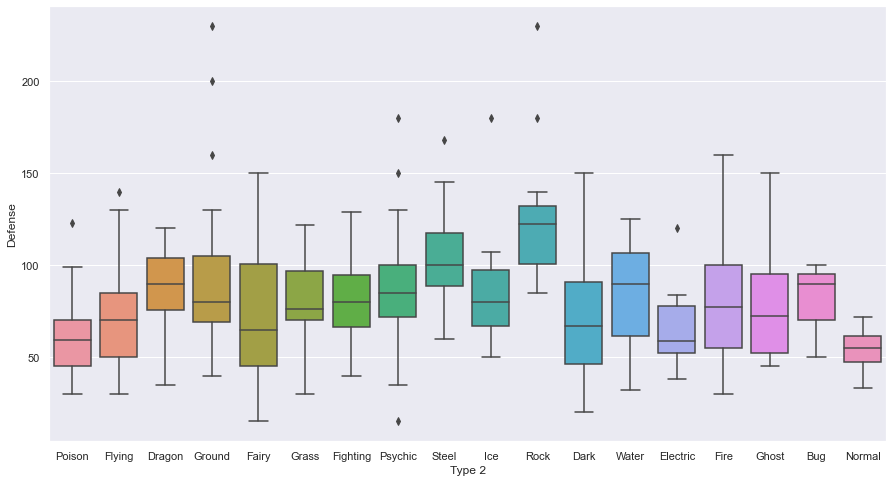

In [30]:
sns.boxplot(x='Type 2',y='Defense',data=df)

## Heat Map showing correlation of continuous variables

<AxesSubplot:>

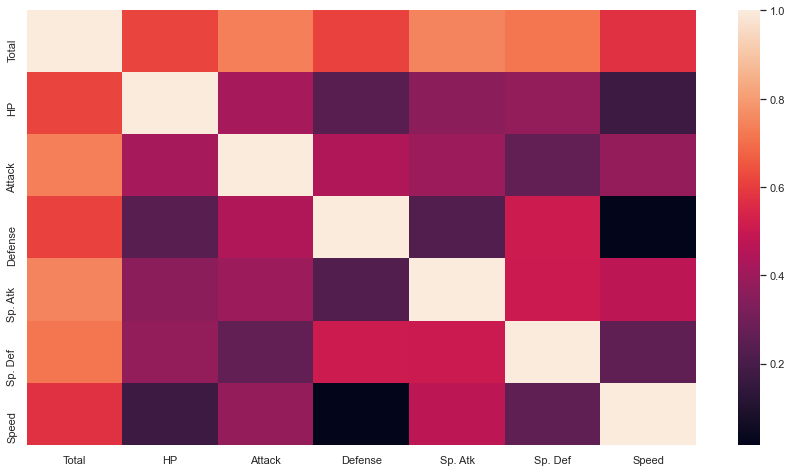

In [31]:
sns.heatmap(df[['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].corr())